In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Activation,Dense,Dropout,Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using Theano backend.
C:\Users\prateek.sri\AppData\Local\Continuum\anaconda3\lib\site-packages\theano\tensor\signal\downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [2]:
print("Hello World")

batch_size = 128
nb_classes = 10
img_rows,img_cols = 28, 28
(X_train, y_train), (X_test, y_test) =mnist.load_data()

# Reshape data
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)

Hello World


In [3]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train/= 255
X_test/= 255
print('X_train shape:',X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

## Convert class vectors to binary matrices
Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)
print('One Hot enc : {}'.format(Y_train[0, :]))

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples
One Hot enc : [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


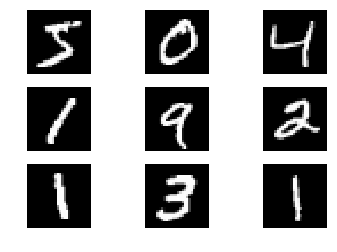

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i,0],cmap='gray')
    plt.axis("off")

In [5]:

model = Sequential()

## Conv 2D (number filters,row_size,column_size,
## input_shape=(number_channels},img_row,img_col))

model.add(Convolution2D(6,5,5,input_shape=(1,img_rows,img_cols),border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(16,5,5,border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(120,5,5))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(10))

model.add(Activation('softmax'))





In [6]:
model.compile(loss='categorical_crossentropy',optimizer='adadelta')

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


In [7]:
nb_epoch = 2
model.fit(X_train,Y_train,batch_size=batch_size,nb_epoch=nb_epoch,show_accuracy= True,verbose=1,validation_data=(X_test,Y_test))
score = model.evaluate(X_test,Y_test,verbose=0)
print('Test score:',score[0])
print('Test accuracy:',score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
59904/60000 [============================>.] - ETA: 0s - loss: 0.2313 - acc: 0.9270

TypeError: ('Bad input argument to theano function with name "C:\\Users\\prateek.sri\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\keras\\backend\\theano_backend.py:390"  at index 0(0-based)', 'Wrong number of dimensions: expected 4, got 3 with shape (128, 28, 28).')

In [ ]:
res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10,10))

for i in range(9) :
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i,0],cmpa='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction = %d" % res[i],fontsize=18)